**Covid Prediction**

In [1]:
!pip install pmdarima

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
import pmdarima as pmd
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet

In [4]:
df_cnf = pd.read_csv('/content/drive/MyDrive/Data/time_series_covid19_confirmed_global.csv')
df_dth = pd.read_csv('/content/drive/MyDrive/Data/time_series_covid19_deaths_global.csv')
df_rcv = pd.read_csv('/content/drive/MyDrive/Data/time_series_covid19_recovered_global.csv')

In [5]:
df_dth

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,106,106,108,110,113,113,119,120,122,125,128,133,133,137,141,145,147,152,152,159,162,167,170,177,181,184,190,192,198,204,210,221,226,229,243,244,250,253,262,265
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,528,528,528,530,535,537,539,541,542,546,553,555,557,560,562,563,563,564,566,570,571,571,572,572,572,573,576,576,580,582,582,583,583,583,583,585,585,585,586,586
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,246,256,260,260,264,264,269,274,277,279,280,280,282,282,282,283,284,287,288,290,292,292,292,292,295,295,297,300,300,306,312,312,320,324,326,326,329,330,330,331


In [6]:
df_dth.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
df_rcv.drop(['Province/State','Lat','Long'],axis=1,inplace=True)
df_cnf.drop(['Province/State','Lat','Long'],axis=1,inplace=True)

In [7]:
df_dth.rename(columns={'Country/Region':'country'},inplace=True)
df_rcv.rename(columns={'Country/Region':'country'},inplace=True)
df_cnf.rename(columns={'Country/Region':'country'},inplace=True)

In [8]:
df_dths=df_dth.groupby('country').sum()
df_rcvs=df_rcv.groupby('country').sum()
df_cnfs=df_cnf.groupby('country').sum()

In [9]:
df_dths.shape,df_cnfs.shape,df_rcvs.shape

((188, 244), (188, 244), (188, 244))

In [10]:
df_dths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1341,1351,1360,1370,1379,1391,1402,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620,1632,1645,1654,1659,1665,1672,1679
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,80,86,86,88,88,90,92,93,94,94,96,100,102,103,105,106,107,107,108,109,112,113,115,117,117,120,124,126,130,131,132,134,136,139,143,144,147,147,152,154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,106,106,108,110,113,113,119,120,122,125,128,133,133,137,141,145,147,152,152,159,162,167,170,177,181,184,190,192,198,204,210,221,226,229,243,244,250,253,262,265
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,528,528,528,530,535,537,539,541,542,546,553,555,557,560,562,563,563,564,566,570,571,571,572,572,572,573,576,576,580,582,582,583,583,583,583,585,585,585,586,586


In [11]:
dfdth=df_dths.T.reset_index().rename(columns={'index':'date'})
dfrcv=df_rcvs.T.reset_index().rename(columns={'index':'date'})
dfcnf=df_cnfs.T.reset_index().rename(columns={'index':'date'})

In [12]:
dfdth.date=pd.to_datetime(dfdth.date)
dfcnf.date=pd.to_datetime(dfcnf.date)
dfrcv.date=pd.to_datetime(dfrcv.date)

In [13]:
dfdth.set_index('date',inplace=True)
dfcnf.set_index('date',inplace=True)
dfrcv.set_index('date',inplace=True)

In [14]:
dfdth_ind=dfdth[['India']]

In [15]:
dfdth_ind = dfdth_ind[dfdth_ind.India > 0]

In [16]:
dfdth_ind.India=np.log(dfdth_ind.India)

In [17]:
dfdth_ind

country,India
date,
2020-03-11,0.000000
2020-03-12,0.000000
2020-03-13,0.693147
2020-03-14,0.693147
2020-03-15,0.693147
...,...
2020-09-17,11.342991
2020-09-18,11.357663
2020-09-19,11.370809


In [18]:
train_ind_dth=dfdth_ind.iloc[0:150]

In [19]:
test_ind_dth=dfdth_ind.iloc[149:]

In [20]:
arima_m = ARIMA(train_ind_dth['India'],order=(2,2,4))
arima_model=arima_m.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.7/dist-packages/statsmode

In [21]:
import itertools
p=d=q=range(5)
pdq=list(itertools.product(p,d,q))

In [22]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
def min_val(dic):
  for x,y in dic.items():
    if y==min(dic.values()):
      print('best parm : ',x)
      print('min_aic : ',y)
      



In [25]:
aic={}
for x in pdq:
  try:
    arima_m = ARIMA(train_ind_dth['India'],order=x)
    arima_model=arima_m.fit()
    print(arima_model.aic,x)
    aic[x] = arima_model.aic
  except:
    continue
min_val(aic)

742.2626154141752 (0, 0, 0)
546.0834408222489 (0, 0, 1)
371.16984815569174 (0, 0, 2)
232.47539521426452 (0, 0, 3)
165.17682246176406 (0, 0, 4)
-235.21848252237953 (0, 1, 0)
-233.48892019062356 (0, 1, 1)
-232.4621973756063 (0, 1, 2)
-253.83312772078403 (0, 1, 3)
-268.30722810969195 (0, 1, 4)
-137.37486532807696 (0, 2, 0)
-265.0206730330924 (0, 2, 1)
-297.1624281341619 (0, 2, 2)
-298.8468297235985 (0, 2, 3)
-300.865394527372 (0, 2, 4)
-173.2352761252468 (1, 0, 0)
-183.68109186440023 (1, 0, 1)
-184.80214621879014 (1, 0, 2)
-208.6332271387178 (1, 0, 3)
-230.45753539812785 (1, 0, 4)
-233.5368855232353 (1, 1, 0)
-262.03736931809084 (1, 1, 1)
-297.13971179969366 (1, 1, 2)
-300.18386370204115 (1, 1, 3)
-300.9350531938516 (1, 1, 4)
-190.44781427583155 (1, 2, 0)
-303.6943631507884 (1, 2, 3)
-301.89606420603934 (1, 2, 4)
-189.10011945512377 (2, 0, 0)
-184.5811093354934 (2, 0, 2)
-195.0910032860126 (2, 0, 3)
-216.67853479668025 (2, 0, 4)
-233.53211519277187 (2, 1, 0)
-275.4443415418356 (2, 1, 1)
-

In [26]:
min_val(aic)

best parm :  (3, 2, 4)
min_aic :  -311.1056381669797


In [27]:
arima_test = arima_model.predict(start=149,end=194,dynamic=True)

In [28]:
np.exp(arima_test)

2020-08-07    0.986459
2020-08-08    1.008489
2020-08-09    1.010393
2020-08-10    0.985831
2020-08-11    0.992811
2020-08-12    1.013147
2020-08-13    0.999873
2020-08-14    0.987291
2020-08-15    1.002565
2020-08-16    1.007313
2020-08-17    0.993328
2020-08-18    0.994914
2020-08-19    1.005241
2020-08-20    0.999818
2020-08-21    0.994003
2020-08-22    1.000696
2020-08-23    1.002401
2020-08-24    0.996339
2020-08-25    0.997657
2020-08-26    1.001938
2020-08-27    0.998964
2020-08-28    0.996819
2020-08-29    1.000184
2020-08-30    1.000448
2020-08-31    0.997586
2020-09-01    0.998622
2020-09-02    1.000506
2020-09-03    0.998842
2020-09-04    0.998030
2020-09-05    0.999733
2020-09-06    0.999658
2020-09-07    0.998307
2020-09-08    0.998951
2020-09-09    0.999769
2020-09-10    0.998893
2020-09-11    0.998608
2020-09-12    0.999441
2020-09-13    0.999312
2020-09-14    0.998693
2020-09-15    0.999066
2020-09-16    0.999406
2020-09-17    0.998956
2020-09-18    0.998875
2020-09-19 

In [29]:
test_ind_dth

country,India
date,
2020-08-07,10.657683
2020-08-08,10.677731
2020-08-09,10.700679
2020-08-10,10.720113
2020-08-11,10.738373
2020-08-12,10.758605
2020-08-13,10.779789
2020-08-14,10.800310
2020-08-15,10.819378


In [30]:
arima_test = pd.Series(arima_test,index=test_ind_dth.index)

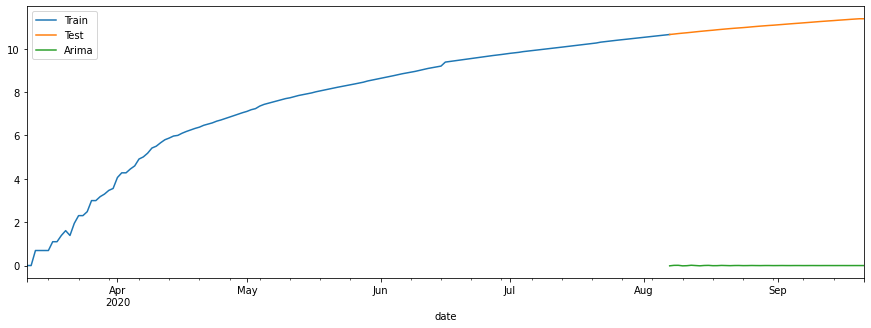

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
train_ind_dth['India'].plot(label='Train',ax=ax)
                   
test_ind_dth['India'].plot(label='Test',ax=ax)
arima_test.plot(label='Arima',ax=ax)
plt.legend()

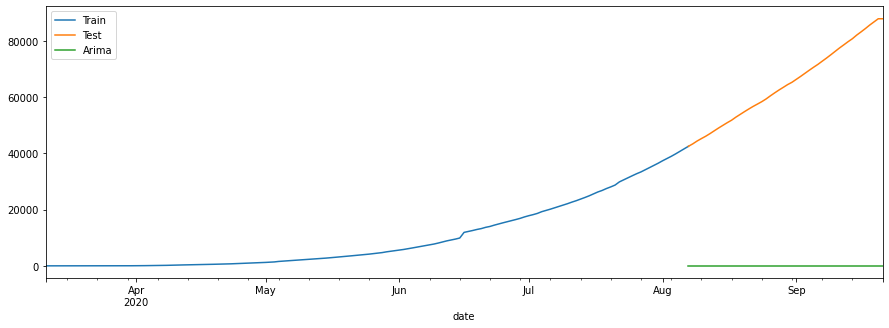

In [32]:
fig, ax = plt.subplots(figsize=(15,5))
np.exp(train_ind_dth['India']).plot(label='Train',ax=ax)
                   
np.exp(test_ind_dth['India']).plot(label='Test',ax=ax)
np.exp(arima_test).plot(label='Arima',ax=ax)
plt.legend()


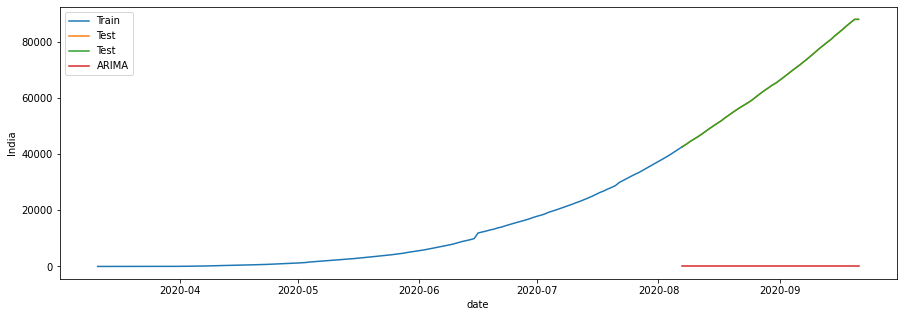

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(train_ind_dth.index,np.exp(train_ind_dth.India),label='Train',ax=ax)
sns.lineplot(test_ind_dth.index,np.exp(test_ind_dth.India),label='Test',ax=ax)
sns.lineplot(test_ind_dth.index,np.exp(test_ind_dth.India),label='Test',ax=ax)
sns.lineplot(arima_test.index,np.exp(arima_test),label='ARIMA',ax=ax)

                   


In [34]:
test_ind_dth

country,India
date,
2020-08-07,10.657683
2020-08-08,10.677731
2020-08-09,10.700679
2020-08-10,10.720113
2020-08-11,10.738373
2020-08-12,10.758605
2020-08-13,10.779789
2020-08-14,10.800310
2020-08-15,10.819378


In [35]:
auto_arima_model = pmd.auto_arima(train_ind_dth.India,start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,max_D=5,seasonal=True,test='adf',m=4,
                            stepwise=True,trace=True,max_order=10,random=True,n_iter=50)
auto_arima_model.aic()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=-269.056, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=-235.218, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=-260.629, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=-265.698, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=-183.385, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=-265.352, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=-256.240, Time=0.13 sec
 ARIMA(0,1,0)(2,0,1)[4] intercept   : AIC=-268.207, Time=0.65 sec
 ARIMA(0,1,0)(1,0,2)[4] intercept   : AIC=-262.214, Time=0.64 sec
 ARIMA(0,1,0)(0,0,2)[4] intercept   : AIC=-266.814, Time=0.33 sec
 ARIMA(0,1,0)(2,0,0)[4] intercept   : AIC=-257.304, Time=0.19 sec
 ARIMA(0,1,0)(2,0,2)[4] intercept   : AIC=-270.535, Time=0.74 sec
 ARIMA(1,1,0)(2,0,2)[4] intercept   : AIC=-272.192, Time=0.81 sec
 ARIMA(1,1,0)(1,0,2)[4] intercept   : AIC=-266.734, Time=0.70 sec
 ARIMA(1,1,0)(2,0,1)[4] intercept

-313.9065465863189

In [36]:
auto=auto_arima_model.predict(n_periods=46)

In [37]:
len(arima_test)

46

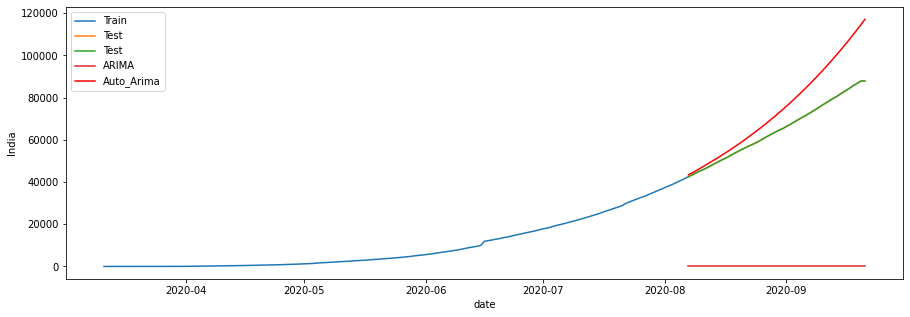

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(train_ind_dth.index,np.exp(train_ind_dth.India),label='Train',ax=ax)
sns.lineplot(test_ind_dth.index,np.exp(test_ind_dth.India),label='Test',ax=ax)
sns.lineplot(test_ind_dth.index,np.exp(test_ind_dth.India),label='Test',ax=ax)
sns.lineplot(arima_test.index,np.exp(arima_test),label='ARIMA',ax=ax)
sns.lineplot(arima_test.index,np.exp(auto),label='Auto_Arima',ax=ax,color='red')

                   

In [39]:

train_ind_dt =train_ind_dth.reset_index().rename(columns={'date':'ds','India':'y'})

In [40]:

test_ind_dt =test_ind_dth.reset_index().rename(columns={'date':'ds','India':'y'})

In [41]:
fb_m = Prophet(interval_width=.95)

In [42]:
fb_m.fit(train_ind_dt)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
fctrain=fb_m.predict(train_ind_dt)

In [44]:
fctest = fb_m.predict(test_ind_dt)

In [45]:
from fbprophet.plot import plot_plotly,plot_components_plotly

In [46]:
plot_plotly(fb_m,fctrain)

In [47]:
plot_plotly(fb_m,fctest)

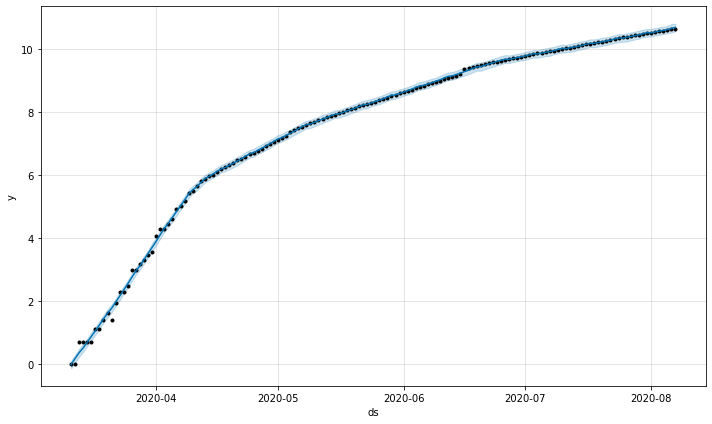

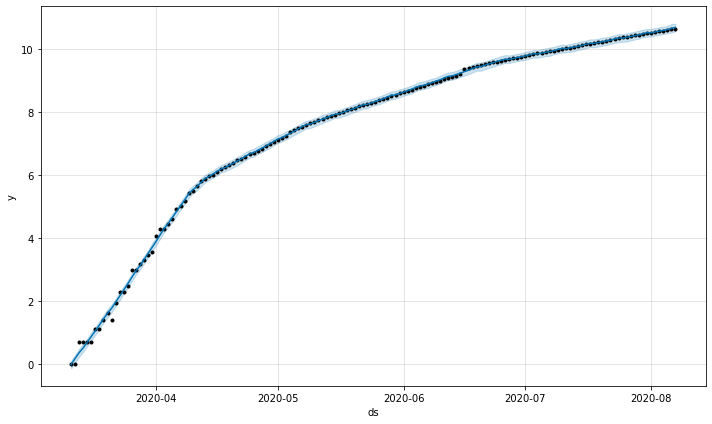

In [48]:
fb_m.plot(fctrain)

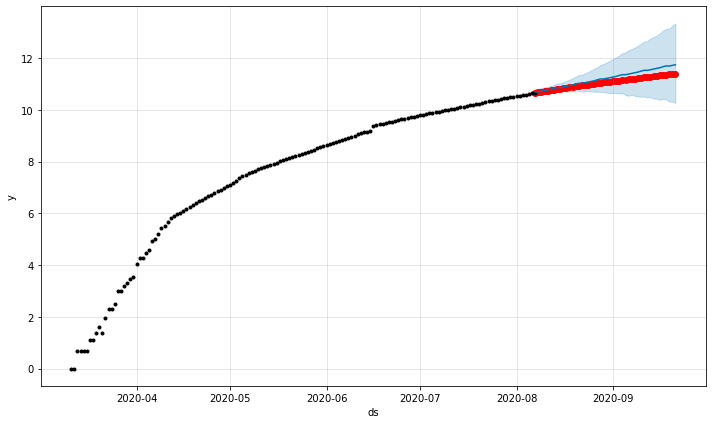

In [49]:
fb_m.plot(fctest)
plt.scatter(test_ind_dt.ds,test_ind_dt.y,color='red',)

In [50]:
fb_test = fctest.yhat

In [51]:
fb_test.values

array([10.6916322 , 10.68852896, 10.7144845 , 10.73942261, 10.76463034,
       10.79113541, 10.82911283, 10.8589905 , 10.85588726, 10.8818428 ,
       10.90678091, 10.93198864, 10.95849371, 10.99647113, 11.0263488 ,
       11.02324556, 11.0492011 , 11.07413921, 11.09934694, 11.12585201,
       11.16382943, 11.1937071 , 11.19060386, 11.2165594 , 11.24149751,
       11.26670524, 11.29321031, 11.33118773, 11.3610654 , 11.35796216,
       11.3839177 , 11.40885581, 11.43406354, 11.46056861, 11.49854603,
       11.5284237 , 11.52532046, 11.551276  , 11.57621411, 11.60142184,
       11.62792691, 11.66590433, 11.695782  , 11.69267876, 11.7186343 ,
       11.74357241])

In [52]:
fb_test = pd.Series(np.exp(fb_test.values),index=test_ind_dt.ds)

In [53]:
fb_test

ds
2020-08-07     43986.242646
2020-08-08     43849.954276
2020-08-09     45003.003155
2020-08-10     46139.403869
2020-08-11     47317.256723
2020-08-12     48588.172282
2020-08-13     50468.912286
2020-08-14     51999.557973
2020-08-15     51838.440892
2020-08-16     53201.549638
2020-08-17     54544.977293
2020-08-18     55937.408746
2020-08-19     57439.856859
2020-08-20     59663.225871
2020-08-21     61472.721167
2020-08-22     61282.252136
2020-08-23     62893.688985
2020-08-24     64481.859287
2020-08-25     66127.960788
2020-08-26     67904.121539
2020-08-27     70532.538946
2020-08-28     72671.684049
2020-08-29     72446.515796
2020-08-30     74351.520607
2020-08-31     76229.020222
2020-09-01     78175.004814
2020-09-02     80274.742559
2020-09-03     83381.999172
2020-09-04     85910.848946
2020-09-05     85644.660044
2020-09-06     87896.714372
2020-09-07     90116.252669
2020-09-08     92416.752382
2020-09-09     94899.015654
2020-09-10     98572.345328
2020-09-11    101

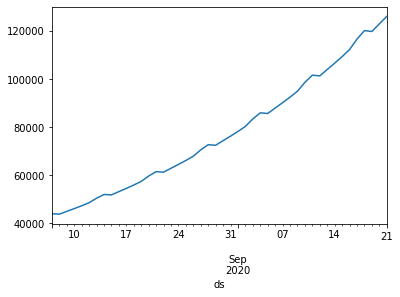

In [54]:
fb_test.plot()

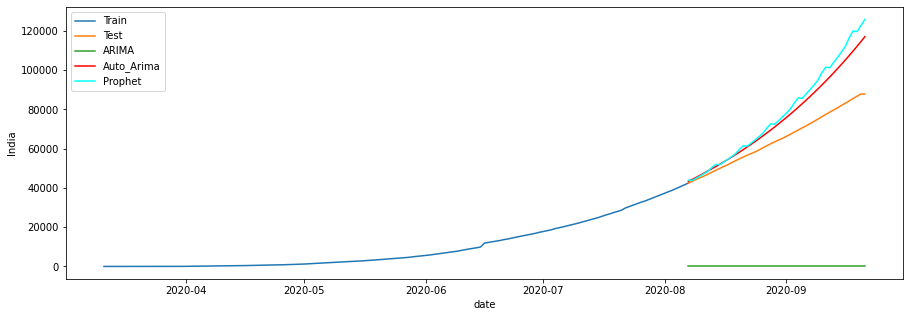

In [55]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(train_ind_dth.index,np.exp(train_ind_dth.India),label='Train',ax=ax)
sns.lineplot(test_ind_dth.index,np.exp(test_ind_dth.India),label='Test',ax=ax)
sns.lineplot(arima_test.index,np.exp(arima_test),label='ARIMA',ax=ax)
sns.lineplot(arima_test.index,np.exp(auto),label='Auto_Arima',ax=ax,color='red')
sns.lineplot(fb_test.index,fb_test.values,color='cyan',label='Prophet',ax=ax)

                   

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
print('FB Prophet rmse : ',mean_squared_error(np.exp(test_ind_dth),fb_test,squared=False))

FB Prophet rmse :  17133.42121002776


In [58]:
print(f'AUTO ARIMA RMSE : {mean_squared_error(np.exp(auto),np.exp(test_ind_dth),squared=False)}')

AUTO ARIMA RMSE : 13032.94143208689


In [59]:
print('ARIMA RMSE :' "{0:.2f}".format(mean_squared_error(np.exp(test_ind_dth),np.exp(arima_test))))

ARIMA RMSE :4359591528.40


In [60]:
mean_squared_error(np.exp(test_ind_dth),np.exp(arima_test))

4359591528.395602

In [61]:
dfdth

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-17,1436,347,1654,53,144,3,12460,925,837,758,571,69,217,4859,7,771,9936,19,40,0,7511,747,13,134935,3,749,56,61,1,49,0,415,9249,62,81,12142,4736,23665,7,88,...,300,738,0,72,27,39,136,98,15772,49,30405,13,836,95,5864,2042,165,7,73,21,58,0,41,60,133,7315,197633,60,3465,402,41794,46,413,520,35,244,1,585,326,224
2020-09-18,1437,353,1659,53,147,3,12656,926,844,763,572,69,220,4881,7,773,9937,20,40,0,7550,752,13,135793,3,753,56,75,1,50,0,416,9256,62,81,12199,4737,23665,7,89,...,301,739,0,72,27,39,140,98,15857,49,30495,13,836,96,5865,2045,168,7,73,21,58,0,41,60,133,7377,198570,61,3535,403,41821,46,419,530,35,250,1,585,329,224
2020-09-19,1437,358,1665,53,147,3,12799,928,849,765,574,73,221,4913,7,776,9944,20,40,0,7586,758,13,136532,3,755,56,81,1,50,0,416,9262,62,81,12254,4737,24039,7,89,...,302,740,0,72,27,39,141,98,15940,49,30495,13,836,97,5865,2045,170,7,73,21,59,0,41,61,138,7445,199282,63,3585,404,41848,46,427,539,35,253,1,585,330,225


# **Start Again in systematic way with prediction for test and Future only for death cases for all countries**

# New Section

In [62]:
dfdth

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-17,1436,347,1654,53,144,3,12460,925,837,758,571,69,217,4859,7,771,9936,19,40,0,7511,747,13,134935,3,749,56,61,1,49,0,415,9249,62,81,12142,4736,23665,7,88,...,300,738,0,72,27,39,136,98,15772,49,30405,13,836,95,5864,2042,165,7,73,21,58,0,41,60,133,7315,197633,60,3465,402,41794,46,413,520,35,244,1,585,326,224
2020-09-18,1437,353,1659,53,147,3,12656,926,844,763,572,69,220,4881,7,773,9937,20,40,0,7550,752,13,135793,3,753,56,75,1,50,0,416,9256,62,81,12199,4737,23665,7,89,...,301,739,0,72,27,39,140,98,15857,49,30495,13,836,96,5865,2045,168,7,73,21,58,0,41,60,133,7377,198570,61,3535,403,41821,46,419,530,35,250,1,585,329,224
2020-09-19,1437,358,1665,53,147,3,12799,928,849,765,574,73,221,4913,7,776,9944,20,40,0,7586,758,13,136532,3,755,56,81,1,50,0,416,9262,62,81,12254,4737,24039,7,89,...,302,740,0,72,27,39,141,98,15940,49,30495,13,836,97,5865,2045,170,7,73,21,59,0,41,61,138,7445,199282,63,3585,404,41848,46,427,539,35,253,1,585,330,225


In [105]:
col=dfdth.columns

In [106]:
len(col)

188

In [107]:
col


Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=188)

In [108]:
from math import trunc

In [109]:
col

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=188)

In [110]:
abc

NameError: ignored

In [111]:
future = pd.DataFrame(columns=['Date','Country','ARIMA','Auto_Arima','Prophet'])
for x in col:
    try:
      del ma_test
      del ama_test
      del fb_test 
      del fbtest
      del dfdth_cn
      del train
      del test
      del train_fb
      del test_fb
      del df_pred
      print(x)
    except:
      print('error')

    try:
      dfdth_cn = dfdth[[x]]
      dfdth_cn=np.log(dfdth_cn[dfdth_cn[x] > 0])
      train=dfdth_cn.iloc[0:trunc(.75*len(dfdth_cn))]
      test = dfdth_cn.iloc[trunc(.75*len(dfdth_cn)):]
    except:
      print('Error in spliting for ',x)
    if len(dfdth_cn) > 0:

# ARIMA Model
      try:
        ma=ARIMA(train,order=(2,2,4))
        ma_fit = ma.fit()
        ma_test = ma_fit.predict(start=test.index[0],end=test.index[-1],dynamic=True) #Arima prediction for test data
        ma_test=pd.Series(np.exp(ma_test),index=test.index)
      except:
        print('Error in ARIMA for ', x)

# AUTO ARIMA
      try:
        ama=pmd.auto_arima(train[x],start_p=0,start_q=0,d=1,max_p=5,max_q=5,max_d=5,max_D=5,seasonal=True,test='adf',m=4,
                            stepwise=True,max_order=10,random=True,n_iter=50)
        ama_test=ama.predict(n_periods=len(test))
        ama_test=pd.Series(np.exp(ama_test),index=test.index)
      except:
        print('Error in AUTO ARIMA for ',x)

# fb_prophet
      try:
        train_fb = train.reset_index().rename(columns={'date':'ds',x:'y'})
        test_fb = test.reset_index().rename(columns={'date':'ds',x:'y'})
        fb_pro = Prophet(interval_width=.95)
        fb_pro.fit(train_fb)
        fb_test=fb_pro.predict(test_fb)
        fbtest=pd.Series(np.exp(fb_test.yhat))
      except:
        print('Error in FB_Prophet for ',x)

# Model to predict future
# ARIMA
      future_dates=pd.date_range(start=dfdth_cn.index[-1],periods=60,freq='D')
      future_dates_df = pd.DataFrame(future_dates,columns=['ds'])
      df_pred = pd.DataFrame(future_dates,columns=['Date'])
      df_pred['Country'] = x

      try:
        f_arima=ARIMA(dfdth_cn,order=(2,2,4))
        f_arima_fit=f_arima.fit()
        future_arima=f_arima_fit.predict(start=future_dates[0],end=future_dates[-1],dynamic=True)
        df_pred['ARIMA'] = np.exp(future_arima.values)
      except:
        print('Error in ARIMA Future for ',x)

# AUTO ARIMA
      try:
        fauto = pmd.auto_arima(dfdth_cn[x],start_p=0,start_q=0,d=1,max_p=5,
                             max_q=5,max_d=5,max_D=5,seasonal=True,test='adf',
                             m=4,stepwise=True,max_order=10,random=True,
                             n_iter=50)
        future_auto = fauto.predict(60)
        df_pred['Auto_Arima'] = np.exp(future_auto)
      except:
        print('Error in Auto_Arima future ',x)

# fbprophet
      try:
        fb_df = dfdth_cn.reset_index().rename(columns={'date':'ds',x:'y'})
        f_fb_m = Prophet(interval_width=.95)
        f_fb_m.fit(fb_df)
        future_fb = f_fb_m.predict(future_dates_df)
        df_pred['Prophet'] = np.exp(future_fb.yhat.values)
      except:
        print('Error in future Prophet for ',x)
      future=pd.concat([future,df_pred],axis=0,ignore_index=True)
# Ploting Test and future
      try:
        fig,ax=plt.subplots(figsize=(15,10))
        plt.title(x,fontsize=40)
        sns.lineplot(train.index,np.exp(train[x]),label='Train',color='blue',ax=ax)
        sns.lineplot(test.index,np.exp(test[x]),label='Test',color='green',ax=ax)
        sns.lineplot(ma_test.index,ma_test.values,label='ARIMA_test',color='cyan',ax=ax)
        sns.lineplot(ama_test.index,ama_test.values,label='Auto_ARIMA_test',color='red',ax=ax)
        sns.lineplot(test.index,fbtest.values,label='Prophet_test',color='yellow',ax=ax)
        sns.lineplot(df_pred.Date,df_pred['ARIMA'],label='ARIMA_future',color='magenta',ax=ax)
        sns.lineplot(df_pred.Date,df_pred['Auto_Arima'],label='Auto_ARIMA_future',color='purple',ax=ax)
        sns.lineplot(df_pred.Date,df_pred['Prophet'],label='Prophet_future',color='black',ax=ax)
        ax.legend(fontsize=20)
        plt.show()
      except:
        print('error in Plotting test for ',x)





Output hidden; open in https://colab.research.google.com to view.

In [112]:
future

,Date,Country,ARIMA,Auto_Arima,Prophet
0,2020-09-21,Afghanistan,0.980474,1440.762915,1453.447392
1,2020-09-22,Afghanistan,0.998439,1444.911590,1437.315737
2,2020-09-23,Afghanistan,1.002823,1452.859715,1465.173732
3,2020-09-24,Afghanistan,0.998440,1446.058756,1519.613945
4,2020-09-25,Afghanistan,0.995730,1444.191388,1496.295443
...,...,...,...,...,...
10495,2020-11-15,Zimbabwe,0.999968,1176.596076,768.578525
10496,2020-11-16,Zimbabwe,0.999857,1212.031329,783.743045
10497,2020-11-17,Zimbabwe,1.000093,1248.533776,810.473053
10498,2020-11-18,Zimbabwe,1.000222,1286.135558,833.483578


In [115]:
future.to_csv('/content/drive/MyDrive/Data/covid19_deaths_prediction_global.csv',index=False)

In [116]:
sample_death = pd.read_csv('/content/drive/MyDrive/Data/covid19_deaths_prediction_global.csv')

In [117]:
sample_death.head()

,Date,Country,ARIMA,Auto_Arima,Prophet
0,2020-09-21,Afghanistan,0.980474,1440.762915,1453.447392
1,2020-09-22,Afghanistan,0.998439,1444.911590,1437.315737
2,2020-09-23,Afghanistan,1.002823,1452.859715,1465.173732
3,2020-09-24,Afghanistan,0.998440,1446.058756,1519.613945
4,2020-09-25,Afghanistan,0.995730,1444.191388,1496.295443


#Let's Do prediction for Recovered Case for all countries same as death cases

In [ ]:
dfrcv.index

In [ ]:
dfrcv.head()

# Let's Do for India
1.   Try Auto ARIMA
2.   Try fbProphet



In [73]:
dfrcv_ind=dfrcv[['India']]

In [74]:
dfrcv_ind.head()

country,India
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0


In [75]:
dfrcv_in = dfrcv_ind[dfrcv_ind.India > 0]

In [76]:
dfrcv_in.India = np.log(dfrcv_in.India)

In [77]:
dfrcv_in

country,India
date,
2020-02-16,1.098612
2020-02-17,1.098612
2020-02-18,1.098612
2020-02-19,1.098612
2020-02-20,1.098612
...,...
2020-09-17,15.229554
2020-09-18,15.252600
2020-09-19,15.274833


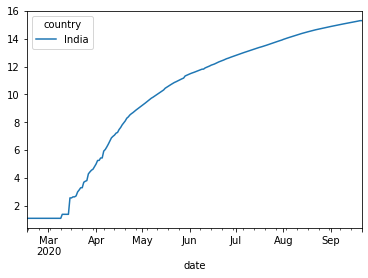

In [78]:
dfrcv_in.plot()

In [79]:
train_in = dfrcv_in.iloc[:150]
test_in = dfrcv_in.iloc[150:]

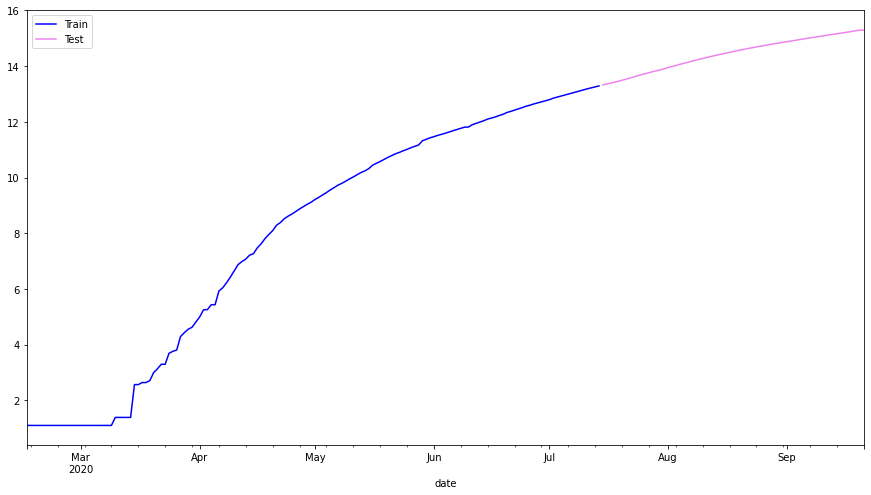

In [80]:
ax,fig=plt.subplots(figsize=(15,8))
train_in.India.plot(label='Train',color='blue')
test_in.India.plot(label='Test',color='violet')
plt.legend()

In [81]:
from pmdarima import auto_arima

In [82]:
model_one = auto_arima(train_in.India,start_P=0,max_P=5,start_p=0,max_p=5,start_q=0,max_q=5,start_Q=0,max_Q=5,d=0,D=0,max_d=2,max_D=2,m=4,
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=867.899, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=1085.662, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[4] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,0,0)(0,0,1)[4] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(1,0,1)[4] intercept   : AIC=181.159, Time=0.35 sec
 ARIMA(0,0,0)(2,0,1)[4] intercept   : AIC=106.129, Time=0.71 sec
 ARIMA(0,0,0)(2,0,0)[4] intercept   : AIC=34.447, Time=0.46 sec
 ARIMA(0,0,0)(3,0,0)[4] intercept   : AIC=10.997, Time=0.99 sec
 ARIMA(0,0,0)(4,0,0)[4] intercept   : AIC=inf, Time=1.55 sec
 ARIMA(0,0,0)(3,0,1)[4] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(0,0,0)(4,0,1)[4] intercept   : AIC=15.164, Time=1.57 sec
 ARIMA(1,0,0)(3,0,0)[4] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,0,1)(3,0,0)[4] intercept   : AIC=inf, Time=0.95 sec
 ARIMA(1,0,1)(3,

In [83]:
auto_test_rcv = model_one.predict(n_periods=len(test_in))

In [84]:
auto_test_rcv

array([13.31687099, 13.34016445, 13.3650074 , 13.38810403, 13.41033977,
       13.43135866, 13.45316112, 13.4735394 , 13.49254255, 13.50940888,
       13.52635508, 13.54337724, 13.55663878, 13.56788592, 13.58008268,
       13.59131593, 13.60095591, 13.609095  , 13.61798208, 13.62594063,
       13.63252317, 13.63753785, 13.64300071, 13.64803851, 13.65108917,
       13.65268114, 13.65488745, 13.65648831, 13.65668934, 13.6556651 ,
       13.65519592, 13.65413366, 13.65188387, 13.64848311, 13.64551945,
       13.64213641, 13.63747468, 13.63175513, 13.62648406, 13.6207909 ,
       13.61402378, 13.60632581, 13.59904509, 13.5913649 , 13.58274971,
       13.57328547, 13.56418505, 13.55475671, 13.54442975, 13.53332999,
       13.52257606, 13.5115206 , 13.49966884, 13.48712612, 13.47490569,
       13.46240878, 13.44920596, 13.43537876, 13.42184403, 13.40807052,
       13.39364673, 13.37865835, 13.36394285, 13.34901399, 13.33350126,
       13.31748179, 13.30171649, 13.2857598 , 13.26928138])

In [85]:
auto_test_rcv_s = pd.Series(auto_test_rcv,index=test_in.index)

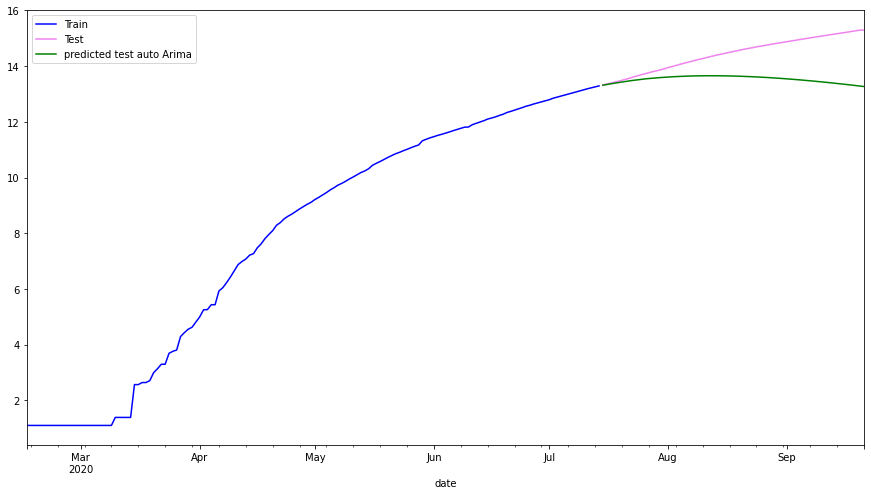

In [86]:
ax,fig=plt.subplots(figsize=(15,8))
train_in.India.plot(label='Train',color='blue')
test_in.India.plot(label='Test',color='violet')
auto_test_rcv_s.plot(label='predicted test auto Arima',color='green')
plt.legend()

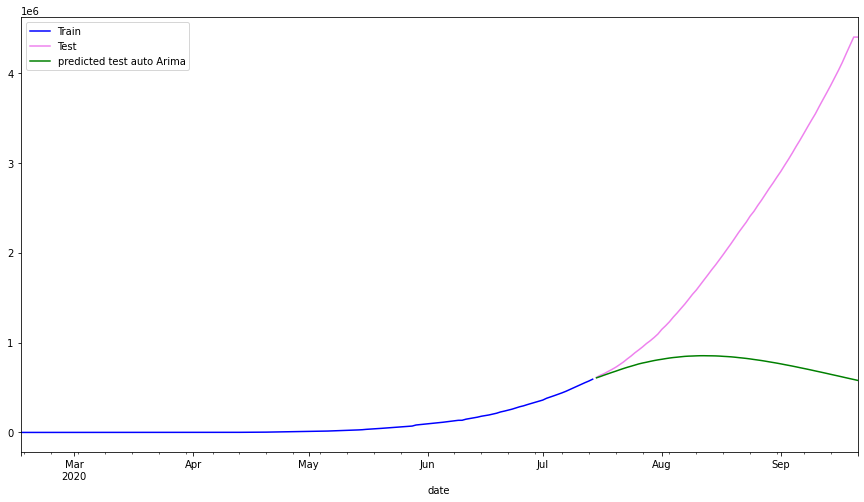

In [87]:
ax,fig=plt.subplots(figsize=(15,8))
np.exp(train_in.India).plot(label='Train',color='blue')
np.exp(test_in.India).plot(label='Test',color='violet')
np.exp(auto_test_rcv_s).plot(label='predicted test auto Arima',color='green')
plt.legend()

In [88]:
from fbprophet import Prophet
train_in_fb = train_in.reset_index().rename(columns={'date':'ds','India':'y'})
test_in_fb=test_in.reset_index().rename(columns={'date':'ds','India':'y'})


In [89]:
model_fb = Prophet()
model_fb.fit(train_in_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [90]:
frc_in = model_fb.predict(test_in_fb)

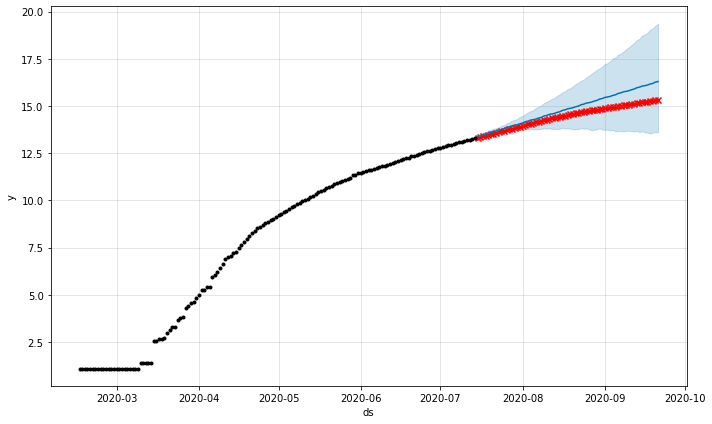

In [91]:
model_fb.plot(frc_in)
plt.scatter(test_in.index,test_in.India,marker='x',color='red')

In [92]:
fb_test_in = pd.Series(frc_in.yhat.values,index=test_in.index)

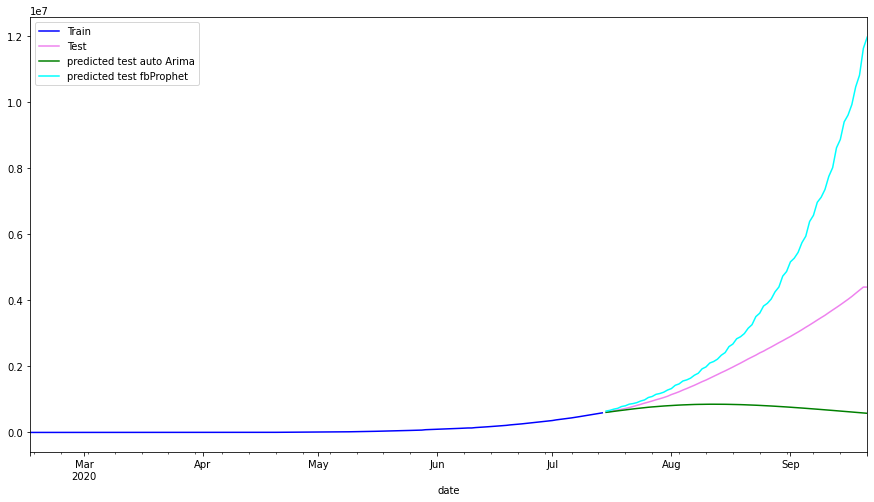

In [93]:
ax,fig=plt.subplots(figsize=(15,8))
np.exp(train_in.India).plot(label='Train',color='blue')
np.exp(test_in.India).plot(label='Test',color='violet')
np.exp(auto_test_rcv_s).plot(label='predicted test auto Arima',color='green')
np.exp(fb_test_in).plot(label='predicted test fbProphet',color='cyan')
plt.legend()

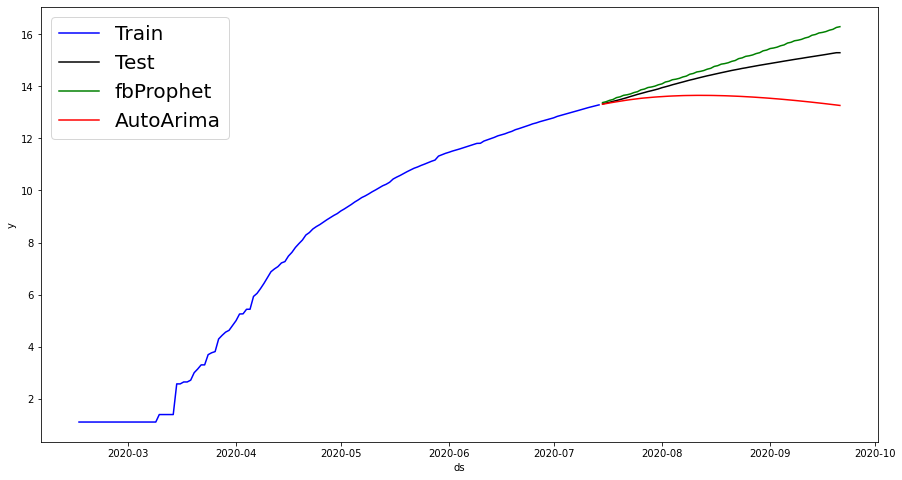

In [94]:
fig,ax1 = plt.subplots(figsize=(15,8))
sns.lineplot(train_in_fb.ds,train_in_fb.y,color='blue',label='Train',ax=ax1)
sns.lineplot(test_in_fb.ds,test_in_fb.y,color='black',label='Test',ax=ax1)
sns.lineplot(test_in_fb.ds,frc_in.yhat.values,color='green',label='fbProphet',ax=ax1)
sns.lineplot(test_in_fb.ds,auto_test_rcv,color='red',label='AutoArima',ax=ax1)
ax1.legend(fontsize=20)

# Let's do model for all countries and save value in a dataframe and download to xl

In [95]:
dfrcv.head()

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
countries=dfrcv.columns
# countries=['Afghanistan','Austria','India','US']

In [97]:
countries

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',
       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=188)

In [98]:
from math import trunc

In [99]:
future_rcv = pd.DataFrame(columns=['Date','Country','Auto_Arima','fbProphet'])
for country in countries:
  try:
    del temp_df
    del atarima_test
    del atarima_future
    del fbpr
    del fbfpr
    print(country)
  except:
    print('Error in initial delete for ',country)
  try:
    dfrcv_con = dfrcv[[country]]
    dfrcv_con = dfrcv_con[dfrcv_con[country] > 0]
    dfrcv_con = np.log(dfrcv_con)
    train = dfrcv_con.iloc[:trunc(.75*len(dfrcv_con))]
    test  = dfrcv_con.iloc[trunc(.75*len(dfrcv_con)):]
  except:
    print('Error in intilal spliting')

  if len(dfrcv_con) > 0:
    try:
      future_dt = pd.date_range(dfrcv_con.index[-1],periods=60,freq='D')
      future_dt_df = pd.DataFrame(future_dt,columns=['ds'])
      temp_df = pd.DataFrame(future_dt,columns=['Date'])
      temp_df['Country'] = country
    except:
      print('Error in definining future Date for ',country)
    
# Auto_Arima model to predict for test data
    from pmdarima import auto_arima
    try:
      atarima = auto_arima(train[country],start_p=0,start_q=0,d=1,max_p=5,
                           max_q=5,max_d=5,max_D=5,seasonal=True,test='adf',m=6,
                            stepwise=True,max_order=10,random=True,n_iter=50)
      atarima_test = atarima.predict(n_periods=len(test))
      atarima_test = pd.Series(atarima_test,index=test.index)
    except:
      print('Error in AutoArima for ',country)
    
# fbProphet Model
    from fbprophet import Prophet    
    try:
      trainfb = train.reset_index().rename(columns={'date':'ds',country:'y'})
      testfb  = test.reset_index().rename(columns={'date':'ds',country:'y'})
      fbm=Prophet(interval_width=.95)
      fbm.fit(trainfb)
      fbpr=fbm.predict(testfb)
    except:
      print('Error in fbProphet for ',country)
    
# Auto_Arima model to predict for future data
    from pmdarima import auto_arima
    try:
      atarima = auto_arima(dfrcv_con[country],start_p=0,start_q=0,d=1,max_p=5,
                           max_q=5,max_d=5,max_D=5,seasonal=True,test='adf',m=6,
                            stepwise=True,max_order=10,random=True,n_iter=50)
      atarima_future = atarima.predict(n_periods=len(future_dt))
      atarima_future = pd.Series(atarima_future,index=future_dt)
      temp_df['Auto_Arima'] = np.exp(atarima_future.values)
    except:
      print('Error in future AutoArima for ',country)
    
# fbProphet Model for future data
    from fbprophet import Prophet    
    try:
      df_fb = dfrcv_con.reset_index().rename(columns={'date':'ds',country:'y'})
      fbmf=Prophet(interval_width=.95)
      fbmf.fit(df_fb)
      fbfpr=fbmf.predict(future_dt_df)
      temp_df['fbProphet'] = np.exp(fbfpr.yhat.values)
    except:
      print('Error in future fbProphet for ',country)
    
    try:
      future_rcv = pd.concat([future_rcv,temp_df],axis=0,ignore_index=True)
    except:
      print('Error in conacatnate for ',country)

    # plot test_predictions and future_predictions
    try:
      fig,ax2=plt.subplots(figsize=(20,15))
      plt.title(country,fontsize=40,color='red')
      sns.lineplot(train.index,np.exp(train[country]),color='violet',label='Train',ax=ax2)
      sns.lineplot(test.index,np.exp(test[country]),color='black',label='Test',ax=ax2)
      sns.lineplot(atarima_test.index,np.exp(atarima_test.values),color='green',label='Auto_Arima',ax=ax2)
      sns.lineplot(testfb.ds,np.exp(fbpr.yhat),color='red',label='fbProphet',ax=ax2)
      sns.lineplot(atarima_future.index,np.exp(atarima_future.values),color='cyan',label='Auto_Arima_future',ax=ax2)
      sns.lineplot(future_dt_df.ds,np.exp(fbfpr.yhat),color='yellow',label='fbProphet_future',ax=ax2)
      ax2.legend(fontsize=20)
      plt.show()
    except:
      print('Error in plotting for ',country)



    
  


Output hidden; open in https://colab.research.google.com to view.

In [100]:
future_rcv

,Date,Country,Auto_Arima,fbProphet
0,2020-09-21,Afghanistan,33524.920824,32313.220962
1,2020-09-22,Afghanistan,34437.517524,32791.442608
2,2020-09-23,Afghanistan,35626.318939,33851.796602
3,2020-09-24,Afghanistan,36927.711993,34272.147076
4,2020-09-25,Afghanistan,38206.095359,34338.419551
...,...,...,...,...
11155,2020-11-15,Zimbabwe,126279.284389,21220.360045
11156,2020-11-16,Zimbabwe,133370.322867,22693.131940
11157,2020-11-17,Zimbabwe,140859.548798,22744.475163
11158,2020-11-18,Zimbabwe,148769.321848,23542.573754


In [101]:
future_rcv.to_csv('/content/drive/MyDrive/Data/covid19_recovery_prediction_global.csv',index=False)

In [102]:
sample_recover = pd.read_csv('/content/drive/MyDrive/Data/covid19_recovery_prediction_global.csv')

In [104]:
sample_recover

,Date,Country,Auto_Arima,fbProphet
0,2020-09-21,Afghanistan,33524.920824,32313.220962
1,2020-09-22,Afghanistan,34437.517524,32791.442608
2,2020-09-23,Afghanistan,35626.318939,33851.796602
3,2020-09-24,Afghanistan,36927.711993,34272.147076
4,2020-09-25,Afghanistan,38206.095359,34338.419551
...,...,...,...,...
11155,2020-11-15,Zimbabwe,126279.284389,21220.360045
11156,2020-11-16,Zimbabwe,133370.322867,22693.131940
11157,2020-11-17,Zimbabwe,140859.548798,22744.475163
11158,2020-11-18,Zimbabwe,148769.321848,23542.573754
